In [1]:
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, L_BFGS, Adam
from neural_stylization.util.build_callback import build_callback
from neural_stylization.util.img_util import load_image

Using TensorFlow backend.


In [4]:
# the standardized dimensions for the images in this notebook
DIMS = (720, 550)

# setting to None uses the default size of the content image.
# WARNING: extremely memory intensive depending on the size
# of the content image. prepare to torture your machine
# DIMS = None

DIMS

(720, 550)

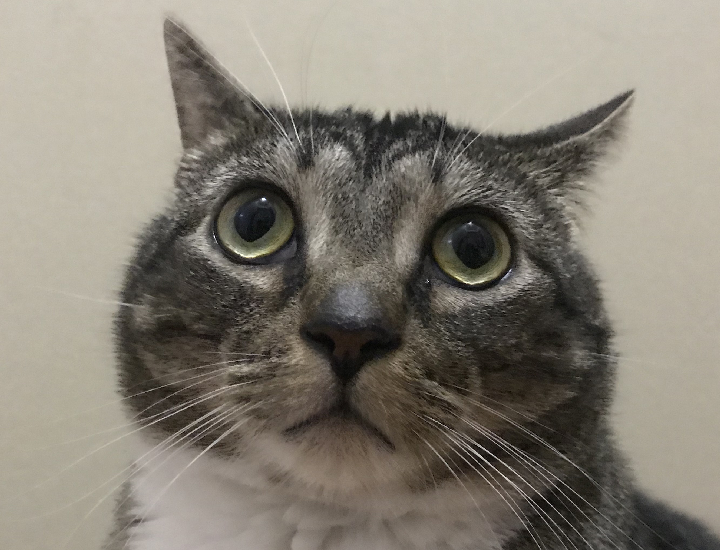

In [5]:
# the location of the base content for this notebook
CONTENT = 'img/content/cat.jpg'
load_image(CONTENT, DIMS)

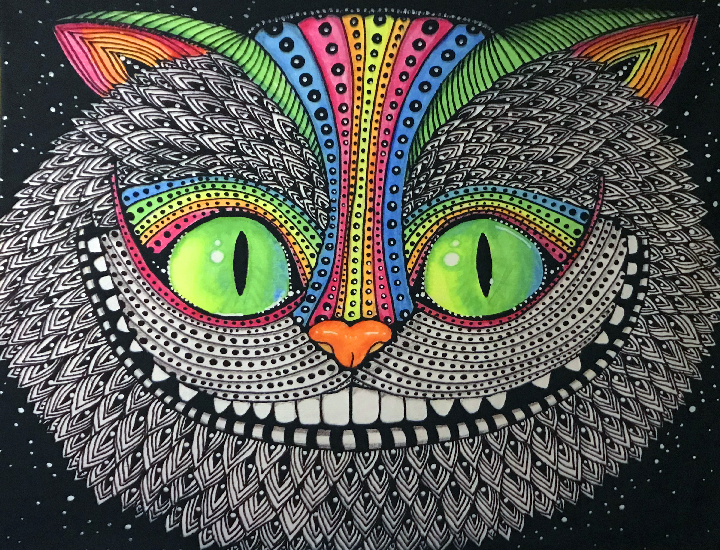

In [6]:
STYLE = 'img/styles/cat.jpg'
load_image(STYLE, DIMS)

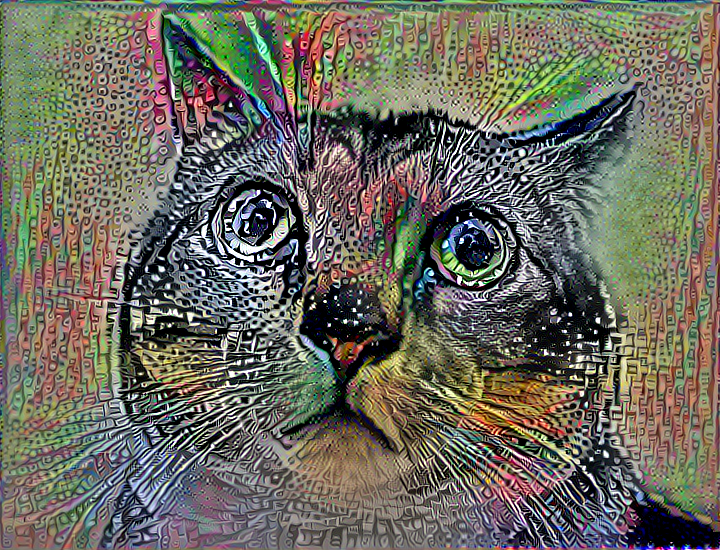

100%|██████████| 16/16 [02:40<00:00, 10.01s/it]


In [7]:
sty = Stylizer(content_weight=1, style_weight=2e3)

seated_nudes = sty(
    content_path=CONTENT,
    style_path='img/styles/cat.jpg',
    optimize=L_BFGS(max_evaluations=20),
    iterations=16,
    image_size=DIMS,
    callback=build_callback('build/transfer/cat')
)